In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [3]:
df = pd.read_csv('data/hw3.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df.plot(kind='box')

In [ ]:
df['high'].fillna(method='ffill', inplace=True)

In [ ]:
df['low'].fillna(method='ffill', inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

In [3]:
df.plot(kind='box')

NameError: name 'df' is not defined

In [4]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


NameError: name 'df' is not defined

In [5]:
df.duplicated().sum()

NameError: name 'df' is not defined

In [6]:
df = df.drop_duplicates()

NameError: name 'df' is not defined

In [7]:
df.token.unique()

NameError: name 'df' is not defined

In [8]:
import xml

In [9]:
def remove_tags(text):
    return ''.join(xml.etree.ElementTree.fromstring(text).itertext())

In [10]:
df.token.unique()

NameError: name 'df' is not defined

In [20]:
# for token in df.token.unique():
#     remove_tags(token)

In [21]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">BTC</span>'], dtype=object)

In [22]:
fill = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>')

In [23]:
df.loc[df['token'].str.contains('<span name="tokenName">'), 'token']

45       <span name="tokenName">UNI</span>
71       <span name="tokenName">CRV</span>
79       <span name="tokenName">SOL</span>
108      <span name="tokenName">CRV</span>
114     <span name="tokenName">USDT</span>
                       ...                
2531     <span name="tokenName">ETH</span>
2533     <span name="tokenName">ETH</span>
2556     <span name="tokenName">SOL</span>
2591     <span name="tokenName">CRV</span>
2651    <span name="tokenName">COMP</span>
Name: token, Length: 139, dtype: object

In [24]:
df.loc[df['token'].str.contains('<span'), 'token']

45       <span name="tokenName">UNI</span>
71       <span name="tokenName">CRV</span>
79       <span name="tokenName">SOL</span>
108      <span name="tokenName">CRV</span>
114     <span name="tokenName">USDT</span>
                       ...                
2531     <span name="tokenName">ETH</span>
2533     <span name="tokenName">ETH</span>
2556     <span name="tokenName">SOL</span>
2591     <span name="tokenName">CRV</span>
2651    <span name="tokenName">COMP</span>
Name: token, Length: 139, dtype: object

In [25]:
df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>').squeeze()

45       UNI
71       CRV
79       SOL
108      CRV
114     USDT
        ... 
2531     ETH
2533     ETH
2556     SOL
2591     CRV
2651    COMP
Name: 0, Length: 139, dtype: object

In [26]:
df.loc[df['token'].str.contains('<span'), 'token'] = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>').squeeze()


/Users/klimyadrintsev/anaconda3/envs/mfe-preprogram/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [27]:
# df.loc[df['token'].str.contains('<span'), 'token'] = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.|\n)*?<\/span>')


In [28]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC'],
      dtype=object)

In [29]:
df.isnull().sum()

ts              0
open            0
high            0
low             0
close           0
volume          0
volumeUSD    2443
token           0
chain           0
dtype: int64

In [30]:
df.isnull().sum()

ts              0
open            0
high            0
low             0
close           0
volume          0
volumeUSD    2443
token           0
chain           0
dtype: int64

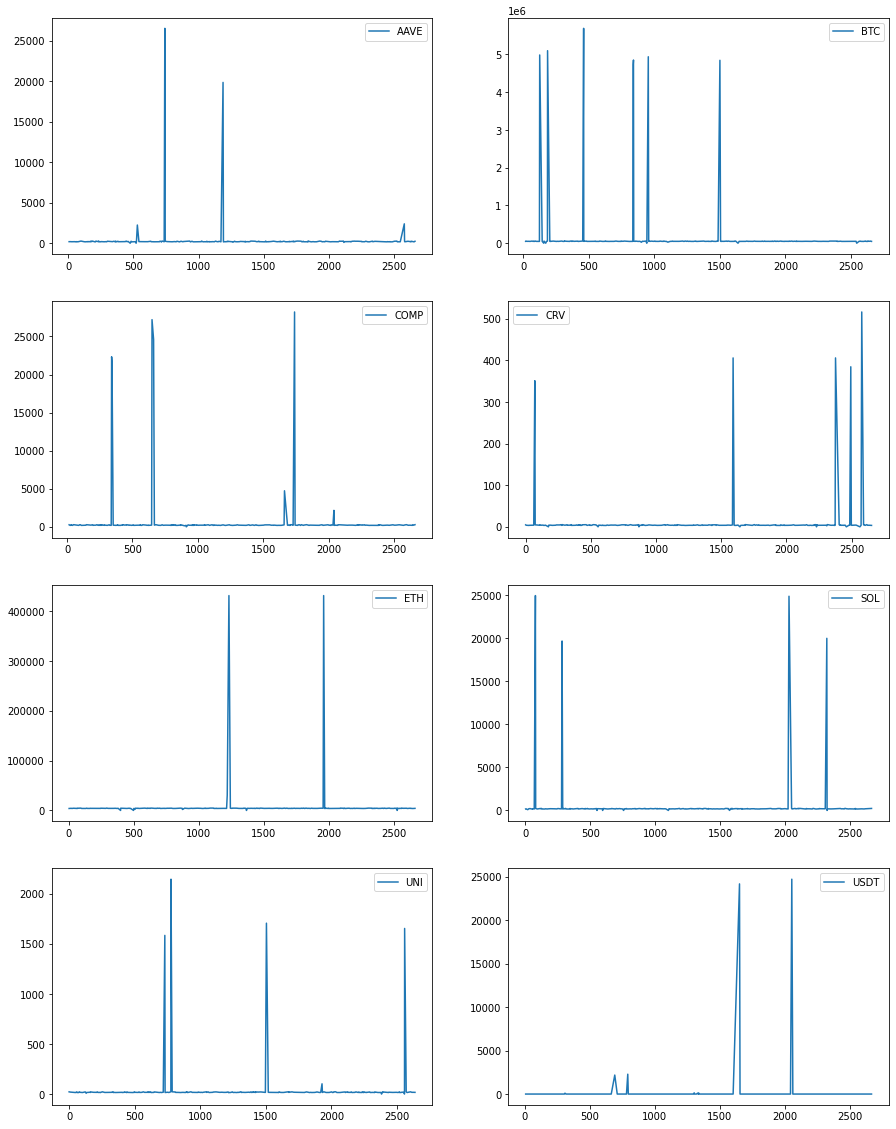

In [31]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [32]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

/Users/klimyadrintsev/anaconda3/envs/mfe-preprogram/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


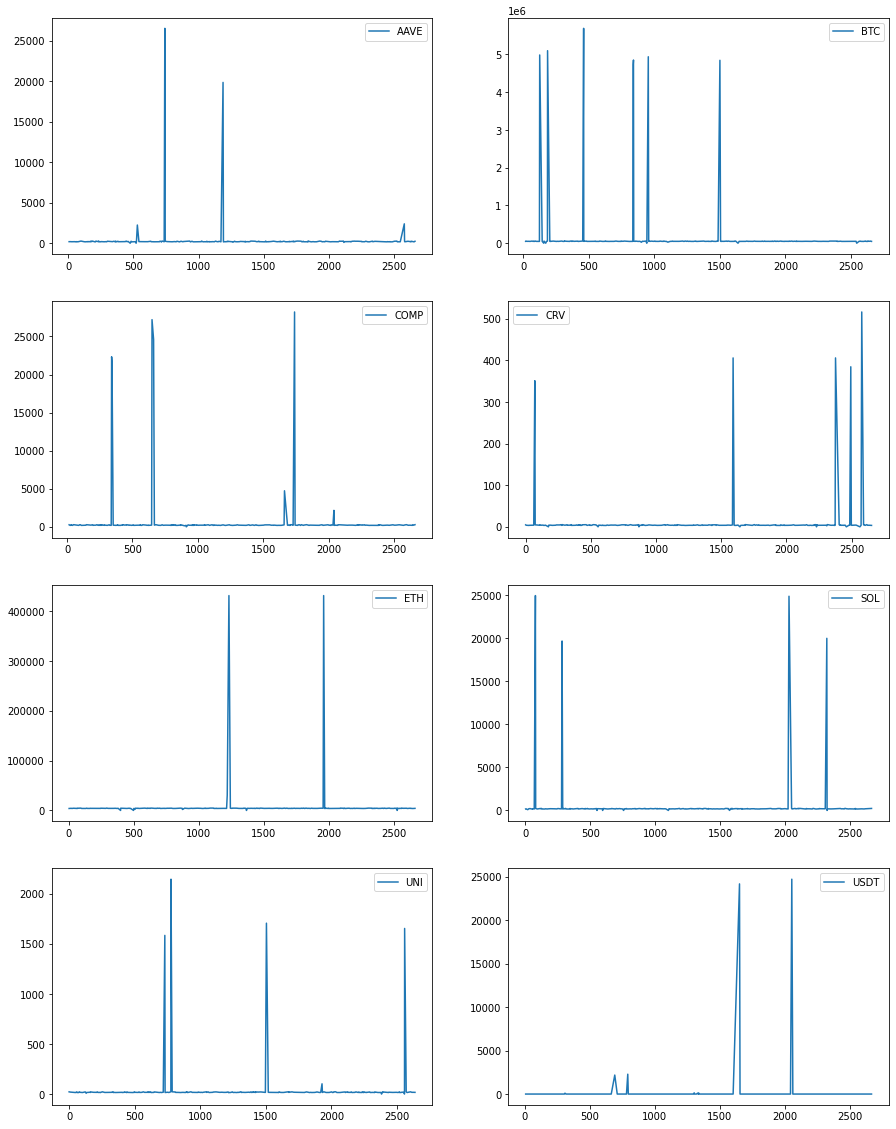

In [33]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [34]:
df.loc[df.close / df.open >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

In [35]:
0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

77      24979.36500
309        97.99540
530      2244.15750
662     24610.43500
692      2184.26040
792      2283.72060
1220    30639.82000
1228        8.28525
1303      136.31555
1329        2.35545
1337      128.81060
1558        2.63705
1651    24169.77025
1663     4737.25000
1929      102.50550
2028    24901.66650
2041     2162.42500
2053    24708.77540
2130        9.35490
2580     2391.63050
dtype: float64

In [36]:
df.loc[df.close / df.open >= 2, 'close']

77      24979.36500
309        97.99540
530      2244.15750
662     24610.43500
692      2184.26040
792      2283.72060
1220    30639.82000
1228        8.28525
1303      136.31555
1329        2.35545
1337      128.81060
1558        2.63705
1651    24169.77025
1663     4737.25000
1929      102.50550
2028    24901.66650
2041     2162.42500
2053    24708.77540
2130        9.35490
2580     2391.63050
Name: close, dtype: float64

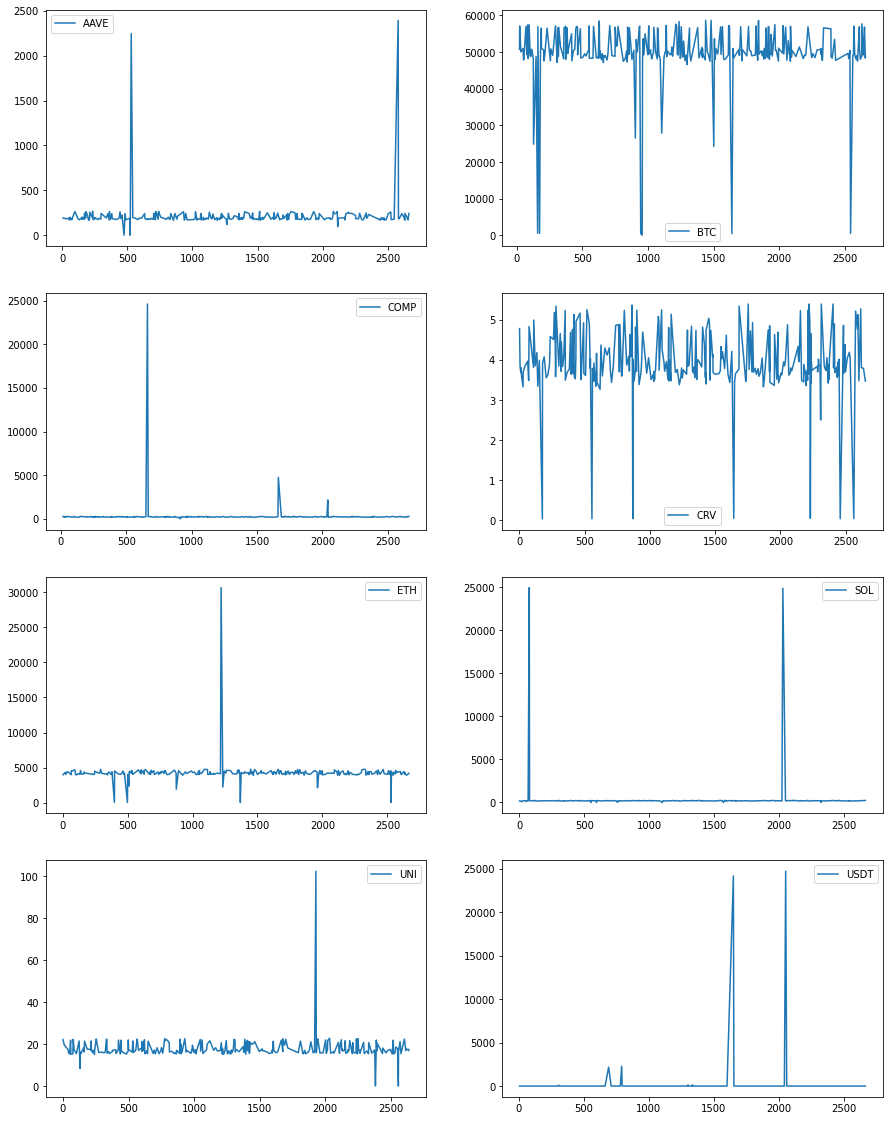

In [37]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [38]:
df.loc[df.close >= (df.close.mean() *5), 'close'] = df.ffill()


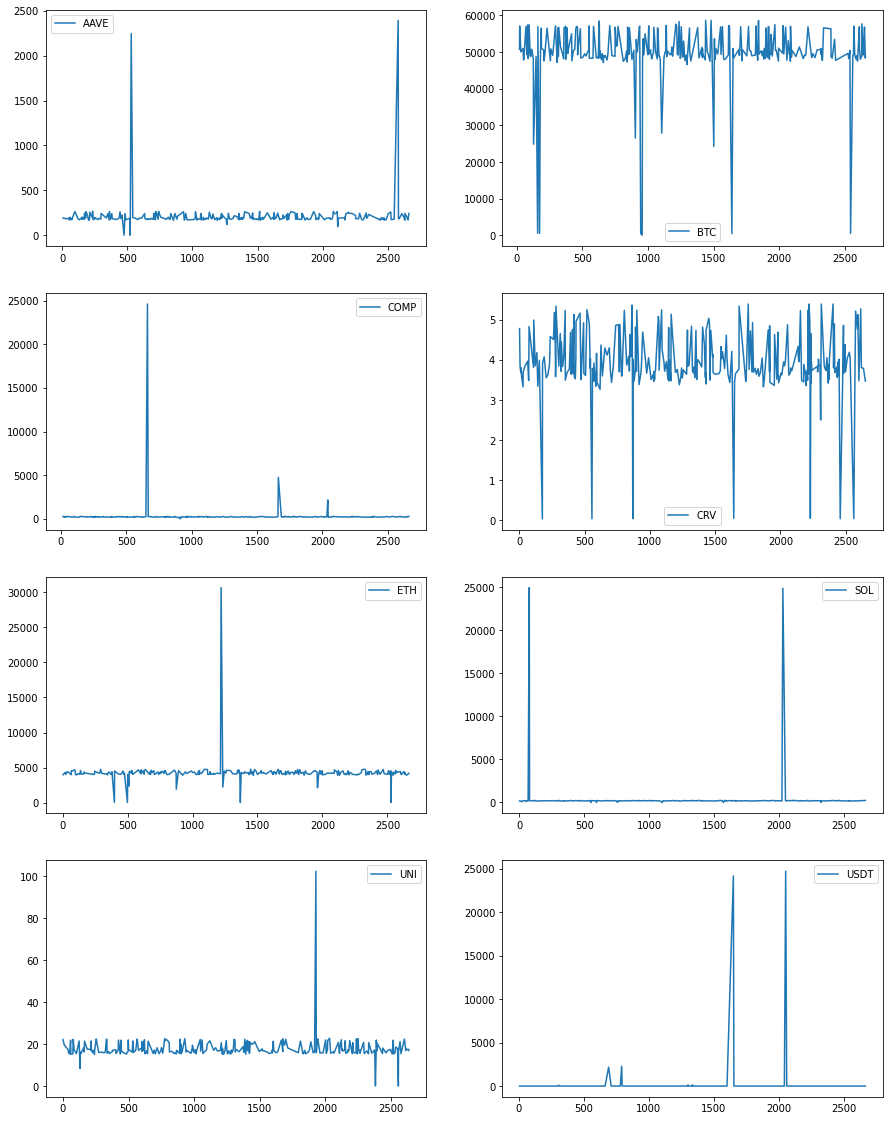

In [39]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


<AxesSubplot:>

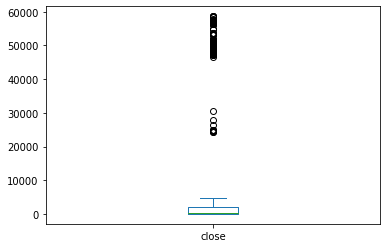

In [40]:
df.close.plot(kind='box')

In [41]:
df.mean()

/var/folders/3s/_b4msy911pd2fxsnmqbwmlnh0000gn/T/ipykernel_4369/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


open           7056.645604
high           7018.537292
low            6843.953050
close          6943.410938
volume       480637.855144
volumeUSD              NaN
dtype: float64

In [42]:
for token in df.token.unique():
    df = df[np.abs(df[df.close == token] - df[df.close ==token]).mean() <= ((3*df[df.close == token]).std())]
    

/var/folders/3s/_b4msy911pd2fxsnmqbwmlnh0000gn/T/ipykernel_4369/232974199.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[np.abs(df[df.close == token] - df[df.close ==token]).mean() <= ((3*df[df.close == token]).std())]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [44]:
df.loc[df.close - df.close.mean() <= (3*df.close.std()), 'close'] = (df.loc[df.close.ffill()])


KeyError: '[22.3516, 4.7806, 175.86, 3972.34, 193.154, 3.8392, 190.872, 1.0013, 1.0009, 19.912, 3.69, 3.68, 194.785, 3.8042, 194.312, 1.001, 271.24, 3.5786, 91.25055, 4329.55, 50748.89, 57107.93, 1.0008, 190.12, 4015.32, 195.02, 183.878, 3.3282, 3.7011, 50059.41, 4323.32, 284.03, 228.41, 250.32, 4413.19, 218.806, 226.72, 17.5782, 211.25, 4392.65, 1.0005, 16.2051, 192.03, 3.8548, 15.9, 50976.21, 171.85, 191.59, 284.1, 15.42, 47875.77, 177.86, 48279.87, 171.72, 202.117, 180.02, 173.02, 22.0176, 202.296, 15.36, 1.0011, 191.682, 3.9662, 175.57, 3994.07, 4545.07, 169.5, 56987.97, 4469.35, 3.485, 189.354, 174.055, 4.8307, 15.459, 49396.33, 24979.365, 22.4303, 227.48, 49186.6, 1.0012500000000002, 57404.01, 213.95, 49408.18, 17.266, 48219.21, 211.23, 48563.33, 191.96, 193.01, 167.46, 57467.07, 4695.78, 179.654, 271.69, 265.498, 4292.85, 4023.16, 15.95, 49162.06, 15.58, 273.36, 4013.2, 48822.19, 3947.02, 3.8113, 191.35, 4.9932, 50772.76, 223.782, 1.0003, 50485.01, 198.401, 195.238, 1.0007, 4149.37, 235.379, 3.85, 184.077, 21.6562, 229.758, 48047.25, 171.78, 24853.415, 170.99, 1.0017, 8.558250000000001, 173.49, 15.45, 4041.02, 4.1831, 16.2984, 1.0006, 4581.014999999999, 170.96, 15.74, 3.34, 16.4923, 199.83, 214.64, 4071.01, 48811.59, 1.0036, 281.29, 168.01, 199.064, 177.87, 3.989, 193.597, 194.069, 201.5, 203.606, 570.3374, 18.4079, 56905.81, 16.3616, 16.9753, 4100.6, 21.5744, 4376.71, 1.0012, 168.34, 177.73, 4229.08, 247.811, 181.812, 512.25, 0.035758, 3.6, 3.9254, 48236.85, 192.4, 264.409, 53838.7, 220.68, 17.7476, 56545.98, 51140.8, 242.9545, 4.0756, 203.748, 270.38, 223.73, 201.274, 191.78, 212.27, 4141.21, 171.03, 174.79, 50463.61, 3.5542, 47574.5, 17.6742, 203.6005, 171.781, 193.565, 257.905, 49118.32, 17.067, 1.013, 21.6382, 17.9717, 220.42, 3.62, 17.0685, 218.76, 190.774, 192.56, 16.11, 283.44, 17.1471, 56535.0, 3.8927, 195.677, 268.767, 219.1, 4.5835, 177.6, 216.98, 195.27, 15.16, 228.72, 17.5571, 181.45, 4015.63, 4167.75, 4495.87, 179.26, 224.774, 200.075, 194.33, 268.89, 22.6133, 47597.01, 21.7418, 197.62, 226.88, 50874.99, 196.67, 4.508, 4299.110000000001, 282.57, 227.09, 190.05, 5.1856, 4.7451, 4.6735, 16.20615, 49120.1, 175.24, 4.3688, 179.03, 3.58, 188.54, 3.8167, 5.3413, 227.92, 196.0725, 191.739, 248.4, 4201.23, 198.27, 177.12, 226.27, 236.481, 4746.05, 57194.41, 16.2557, 179.93, 181.397, 244.974, 4354.22, 212.25, 3.8449999999999998, 4172.24, 1.0014, 203.47, 47170.94, 194.21, 97.9954, 234.552, 199.187, 50238.17, 4.6575, 16.06, 56705.6, 48853.17, 167.64, 56755.0, 3.7134, 4.4522, 16.27, 272.19, 17.3437, 175.42, 209.94, 21.9231, 3.8349, 51525.6, 22.5207, 21.8238, 15.8, 195.61, 193.645, 4.0667, 222.685, 168.09, 225.478, 214.74, 4070.02, 3964.47, 4206.68, 16.621, 190.453, 242.521, 5.2291, 3.495, 219.48, 15.67, 48551.6, 48195.71, 213.56, 4368.63, 56582.72, 193.958, 170.9, 227.0045, 266.257, 3.67, 194.68, 170.27, 184.843, 196.68, 180.7, 179.99, 57064.04, 47999.35, 196.09, 16.4646, 17.1589, 191.196, 52038.14, 4411.09, 242.18, 56629.9, 3.78, 210.93, 196.58, 270.66, 49636.84, 1.0015, 197.12, 50529.21, 4.6913, 185.647, 4.0236, 3.64, 183.09, 45.7227, 4520.01, 3.997, 179.6, 17.4657, 15.65, 231.136, 4.7604, 168.52, 3.66, 195.62, 177.64, 177.39, 4.7763, 55004.35, 5.1328, 47568.43, 3.59, 17.2675, 4215.01, 22.0763, 258.96, 211.84, 1.0016, 4127.91, 3.5265, 270.29, 50459.64, 185.663, 4.0955, 4.9599, 218.163, 15.48, 199.66, 16.07, 50713.78, 22.043, 221.2, 263.559, 16.9175, 194.463, 4029.99, 56362.82, 1.00055, 186.96, 190.99, 271.99, 57010.93, 217.04, 178.79, 171.37, 226.15, 224.535, 56796.149999999994, 49229.55, 268.85, 5.1669, 4518.2, 51275.46, 15.78, 192.148, 3.8084, 4033.84, 3.5052, 202.67, 2.46716, 4207.86, 240.43, 228.948, 207.612, 217.05, 218.54, 240.266, 56351.04, 223.03, 48388.08, 173.64, 16.25, 171.61, 195.9, 4.9267, 16.6004, 16.6449, 22.1421, 39.6132, 17.601, 3952.37, 4028.68, 48562.74, 219.89, 1.0019, 269.85, 3.61, 226.42, 190.749, 193.84, 2369.71, 4315.88, 170.52, 4485.94, 49545.8, 190.436, 5.25, 186.138, 2.6323000000000003, 193.311, 170.92, 170.36, 48950.49, 16.2884, 4205.22, 2244.1575, 4598.78, 21.651, 219.3, 214.82, 4.9048, 16.13, 218.131, 4036.5299999999997, 196.503, 198.851, 3.7902, 4.0295, 169.84, 228.483, 50637.38, 202.437, 56497.92, 57142.61, 1.7008, 48302.76, 196.16, 218.14, 17.2897, 0.0356999999999999, 193.494, 206.5, 218.86, 3.7892, 283.73, 205.68, 1.0004, 22.5298, 22.4126, 3.47, 3.9224, 196.716, 180.88, 17.1457, 272.03, 48321.62, 176.166, 57030.83, 4672.02, 3.3427, 190.644, 3.6523, 3.908, 4.1636, 189.914, 18.0968, 1.80936, 3.4451, 4296.86, 225.102, 17.6902, 17.1183, 21.3223, 4118.95, 16.6689, 48393.18, 4682.45, 4189.52, 223.06, 190.992, 197.46, 20.929, 17.2924, 17.0436, 196.134, 48584.4, 3.2646, 4513.08, 48332.05, 22.2287, 223.12, 15.57, 4.3714, 4167.91, 4056.19, 58485.88, 4582.04, 15.7, 48423.63, 50357.07, 242.957, 169.71, 188.562, 4720.8099999999995, 16.9517, 219.06, 181.476, 211.72, 15.7863, 47936.58, 16.6079, 49342.56, 21.5183, 270.20500000000004, 193.485, 49548.67, 180.84, 186.349, 4.2939, 187.353, 176.46, 48410.6, 47141.259999999995, 192.644, 49010.93, 24610.435, 230.886, 179.188, 4078.98, 48641.73, 4383.05, 4.1194, 181.851, 49062.41, 191.643, 270.96, 4024.2, 187.634, 180.28, 48546.75, 201.501, 4634.95, 271.27, 48229.71, 190.385, 47848.01, 15.64, 4.3019, 4325.71, 2184.2604, 49115.37, 178.841, 215.73, 17.372, 3.7552, 223.302, 203.9, 178.91, 185.098, 4564.79, 245.772, 15.545, 4076.94, 3.44, 245.126, 57226.5, 4043.45, 193.751, 204.68, 175.735, 196.136, 182.3605, 194.19, 18.4014, 3.81, 267.07, 3.921, 4209.49, 49045.49, 4.1017, 245.47, 218.016, 270.94, 4361.61, 16.0303, 194.913, 203.76, 179.51, 4325.88, 4.8615, 4025.45, 266.1, 245.017, 216.18, 184.769, 17.0395, 48847.33, 56569.29, 56789.0, 4348.43, 4164.305, 223.81, 2.29099, 51536.02, 202.208, 190.71, 4.8769, 15.8586, 176.16, 4492.97, 173.47, 51800.41, 3.7, 4384.39, 202.337, 4.8853, 57005.2, 174.57, 221.707, 22.6922, 21.600450000000002, 4352.200000000001, 211.757, 4171.52, 187.972, 3.5943, 223.53, 4535.63, 22.4456, 169.92, 210.61, 4593.045, 189.51, 2283.7205999999996, 224.29, 182.996, 180.52, 177.829, 211.79, 21.759, 192.89, 4010.77, 283.25, 5.2353, 220.88, 219.76, 186.466, 20.8179, 47485.11, 16.44025, 281.01, 202.384, 175.47, 1.0025, 4033.17, 184.007, 4061.09, 3.8704, 179.546, 197.565, 201.114, 199.27, 177.867, 268.75, 16.7304, 191.86, 243.603, 50240.2, 49370.94, 4.0905, 199.515, 47309.865000000005, 225.924, 48453.45, 3.72, 56819.56, 193.64, 210.868, 4.6304, 168.32, 15.55, 49289.31, 49449.69, 167.91, 4.0804, 56637.87, 16.2022, 4651.82, 224.97, 5.37, 243.095, 3.775, 17.168, 0.037671, 270.7, 4.0125, 4172.81, 1930.7649999999999, 225.16, 47969.65, 192.023, 181.032, 215.949, 211.214, 3.7247, 4.8144, 50519.68, 4573.25, 22.4826, 17.9671, 191.095, 3.7127, 137.78185, 20.0526, 5.2423, 15.5607, 192.666, 26521.558650000003, 17.832099999999997, 48271.88, 53431.06, 193.6, 2.1451, 4114.58, 49969.58, 4121.41, 3.3838, 50320.25, 238.201, 191.777, 3917.24, 228.81, 256.33, 22.743, 264.816, 56739.42, 210.78, 3.8301, 57084.36, 173.99, 170.93, 16.302, 186.381, 17.1735, 484.3679, 4.6952, 4406.51, 189.613, 175.55, 243.99, 210.31, 4149.73, 15.395, 188.09, 47988.27, 171.83, 279.68, 223.047, 53638.04, 210.79, 272.89, 16.19, 49237.59, 186.41, 193.11, 271.53, 215.176, 55000.0, 199.718, 16.1, 16.3003, 17.6214, 192.176, 17.0539, 19.6312, 218.25, 4.0546, 4514.59, 270.95, 218.77, 49259.39, 176.82, 16.12, 220.12, 4298.6, 226.517, 17.2209, 57152.27, 50529.56, 49407.75, 200.35, 3.5107, 17.4088, 182.088, 4315.95, 220.01, 227.006, 4371.91, 15.5, 205.716, 178.21, 50611.36, 49913.26, 190.56, 17.7373, 262.621, 3.6324, 48909.61, 222.67, 48110.26, 3985.08, 189.617, 3.4649, 3.711, 224.297, 170.45, 3.51, 204.193, 3.6908, 4111.0, 49994.725000000006, 184.691, 3.74, 56780.42, 198.563, 22.388, 4006.34, 16.791, 217.19, 285.05, 4582.28, 4136.87, 181.202, 50089.64, 210.63, 4180.5, 220.02, 22.1032, 195.015, 187.64, 244.361, 5.0824, 4149.93, 4.9586, 48121.77, 56625.54, 196.687, 56301.44, 4316.94, 182.435, 273.64, 182.481, 198.732, 48889.68, 201.272, 170.418, 213.82, 48957.28, 209.01, 4754.09, 5.2458, 191.8, 47910.93, 4.2476, 218.32, 17.5716, 187.099, 20.0867, 1.7113999999999998, 178.284, 27865.96555, 198.391, 195.287, 192.698, 272.1, 3.9233, 273.88, 194.138, 189.185, 3.715, 4730.09, 4025.34, 183.57, 172.01, 21.7105, 48387.59, 181.42, 272.26, 187.733, 3.9567, 49811.8, 200.25, 258.287, 4047.22, 50285.87, 4124.01, 4414.87, 227.76, 3.5147, 57307.59, 4038.67, 3.87, 48738.34, 189.954, 4.8048, 185.3, 3.5, 3.47325, 50305.85, 17.1985, 169.56, 184.231, 3.9919, 4102.74, 4074.19, 237.608, 197.39, 4040.95, 214.15, 3.48, 4158.57, 5.1396, 18.4081, 4050.54, 49308.16, 196.71, 193.592, 1.0018, 175.28, 186.56, 4.6006, 49337.76, 49660.08, 16.8926, 4156.66, 16.8309, 51377.26, 50254.43, 237.873, 48889.99, 198.16, 4221.86, 166.98, 260.46, 171.2, 17.1038, 17.1493, 192.383, 3.7045, 200.85, 20.7881, 198.62, 3.76, 176.585, 57616.41, 186.52, 219.413, 4125.39, 15.44, 17.9867, 57131.16, 15.4, 30639.82, 182.41, 49284.91, 244.102, 190.213, 3.3795, 15.41, 8.28525, 225.516, 49241.12, 2232.425, 194.087, 16.91675, 58319.32, 3.5618, 165.32, 271.79, 3.7985, 4496.66, 21.8479, 48262.73, 220.46, 49087.76, 3.55, 17.1108, 213.04, 56945.94, 184.201, 3.75, 4216.93, 4615.2, 177.78, 48724.64, 16.9817, 120.82669999999999, 189.09, 48624.41, 179.027, 193.46, 53010.37, 16.066, 196.256, 227.1025, 245.164, 15.35, 188.623, 212.704, 47688.63, 17.3308, 183.79, 17.2614, 15.97, 4.743, 16.7, 49159.96, 3.84, 4581.68, 221.505, 46588.66, 178.576, 17.2645, 186.757, 3.8837, 270.91, 136.31555, 22.3953, 22.1489, 189.109, 4118.7, 22.2938, 220.91, 189.437, 16.3872, 194.393, 56559.49, 50149.19, 205.452, 4.8401, 220.229, 210.814, 17.5764, 226.714, 47556.07, 3.71, 2.35545, 212.87, 178.49, 211.507, 230.098, 128.8106, 200.81, 3.8279, 4090.45, 16.485999999999997, 3.5591, 210.5, 4619.0, 203.174, 4355.5, 207.364, 178.647, 4.7341, 4401.84, 4677.98, 180.15, 243.559, 3.5105, 3.871, 173.81, 4038.3, 169.31, 200.802, 41.5432, 4.0045, 195.55, 193.194, 18.8621, 230.239, 4318.33, 183.717, 192.178, 56673.75, 199.766, 16.2, 22.4633, 48416.15, 198.26, 227.887, 270.6, 4141.99, 188.849, 15.34, 4171.41, 167.77, 3.82445, 191.67, 21.5582, 263.363, 181.94, 4407.74, 4.8173, 17.0691, 190.38150000000002, 230.221, 21.9103, 196.944, 188.582, 51326.18, 4238.84, 48531.96, 50943.63, 49155.17, 16.8375, 4.3856, 49338.61, 254.46, 21.2659, 15.725000000000001, 3.7679, 4272.9, 194.093, 3.5592, 20.9807, 3.3981, 4226.38, 189.85, 3998.87, 4291.61, 244.37, 47846.62, 174.54, 58664.4, 170.72, 4106.06, 19.9871, 192.136, 269.975, 188.318, 4772.6, 223.29, 50116.68, 5.0394, 193.0615, 4127.88, 20.7035, 4.8983, 49587.25, 176.58, 4395.96, 3.4942, 21.3182, 249.558, 185.04, 177.17, 4.737, 3874.87, 4369.58, 47476.7, 189.472, 195.658, 188.549, 4727.15, 4.0813, 4.1285, 196.74, 50692.81, 4483.59, 176.13, 170.25, 196.235, 185.934, 16.5897, 4099.925, 24241.68, 4015.36, 219.96, 4145.37, 17.048099999999998, 53638.72, 50706.18, 172.57, 192.628, 47939.94, 193.339, 190.701, 255.64, 49011.46, 267.344, 50967.13, 17.8647, 193.163, 17.0057, 17.2039, 173.72, 4317.66, 168.75, 181.329, 4567.88, 4203.22, 49479.22, 195.2595, 187.3055, 180.35, 191.793, 230.837, 201.732, 3.73, 178.087, 197.452, 4.3348, 4332.85, 4236.0, 260.55, 4194.98, 193.365, 56871.69, 232.686, 203.764, 49371.73, 4.2038, 2.63705, 16.3172, 168.03, 212.14, 225.378, 4.0097, 4125.02, 4091.18, 56965.41, 4130.92, 1.0004499999999998, 1.87775, 3.7829, 48552.18, 251.656, 218.82, 48005.02, 198.08, 228.303, 185.325, 4.6151, 221.33, 48014.55, 242.123, 4.05645, 196.402, 17.189, 16.01, 180.243, 3.6305, 1.0008499999999998, 189.776, 180.92, 4567.69, 188.9, 17.2735, 4363.27, 4343.34, 16.9129, 49228.34, 3.4355, 56350.99, 197.31, 57263.63, 4050.08, 4301.82, 200.831, 4022.97, 56863.51, 221.553, 177.19, 4413.58, 178.6, 252.19, 4.21055, 193.378, 3.6743, 4275.26, 4354.63, 186.039, 223.301, 185.052, 16.3696, 476.8632, 192.418, 190.53, 4063.16, 0.0465299999999999, 190.546, 200.71, 187.701, 50995.41, 3.4528, 24169.77025, 48357.63, 208.676, 246.86, 4744.7, 197.014, 4712.23, 4737.25, 172.55, 21.8709, 222.845, 22.0372, 4078.19, 168.19, 172.84, 179.84, 4490.75, 17.3662, 16.5609, 22.7085, 4563.73, 3.77, 211.53, 218.9, 4024.31, 19.6081, 50663.97, 49245.56, 187.44, 189.833, 228.122, 49112.93, 22.4207, 229.85, 197.48, 189.377, 4167.96, 197.638, 56963.08, 195.7, 278.96, 195.109, 3970.92, 18.3118, 4496.25, 47623.88, 50690.21, 278.7, 4045.72, 232.19, 171.11, 198.38, 168.96, 243.7575, 194.263, 3.4625, 3.4887, 178.67, 282.865, 232.274, 225.52, 4121.82, 4165.72, 4020.1, 4271.17, 49011.32, 48982.43, 5.3929, 212.45, 265.502, 198.583, 192.99, 219.46, 56992.8, 170.55, 4357.42, 4324.39, 4.7212, 50470.73, 281.31, 181.71, 4209.07, 267.81, 4036.18, 170.81, 50269.3, 187.9, 4.9311, 251.145, 48988.73, 280.5, 179.43, 16.03, 179.59, 17.4928, 184.708, 243.146, 169.82, 3.79, 4732.27, 21.5923, 4201.01, 229.51, 4017.96, 49196.68, 4371.74, 4700.58, 50925.3, 16.09, 15.81, 3.7819, 4365.04, 283.09, 47771.25, 4169.27, 178.01, 243.504, 196.826, 58610.19, 245.771, 17.1931, 220.08, 49484.22, 192.417, 15.66, 4344.51, 193.2, 188.7, 202.82, 15.6, 218.67, 200.552, 226.22, 3925.1, 4.0483, 50317.33, 16.14, 170.185, 220.3, 4539.06, 178.38, 48994.53, 16.4746, 50283.71, 4164.85, 196.343, 17.7141, 18.2733, 48084.63, 184.349, 51014.13, 176.87, 232.195, 21.2905, 196.39, 48264.63, 188.504, 56577.59, 197.93, 49565.25, 4035.07, 4034.52, 206.34, 179.38, 4.7475, 16.02, 4088.28, 48496.29, 4141.67, 4.0872, 4.8507, 56900.0, 50176.25, 188.586, 102.5055, 199.51, 265.883, 16.0411, 225.78, 49851.69, 17.8873, 49351.61, 54804.0, 4594.03, 21.8305, 4559.53, 229.129, 50472.66, 220.505, 48918.71, 176.765, 269.83, 183.693, 3.365, 230.16, 4.6343, 196.28, 4404.7, 16.5087, 15.9044, 2134.9402, 195.18, 223.211, 201.433, 172.16, 57498.26, 176.76, 3900.91, 50454.55, 190.878, 3.5123, 243.256, 4379.34, 4168.49, 4568.12, 4.6928, 3.43, 4047.66, 47536.17, 51055.32, 210.3895, 4546.65, 3970.02, 197.218, 221.96, 22.118, 180.51, 3.63, 204.53, 224.45, 173.59, 188.436, 17.2497, 183.08, 21.8667, 218.62, 167.49, 4040.1, 270.89, 3.9485, 190.237, 49661.27, 24901.6665, 57195.5, 3.8526, 22.9051, 220.43, 49519.73, 3.9126, 4208.1, 3.9766, 2162.425, 205.02, 194.5, 192.48, 224.05, 56801.31, 174.22, 24708.775400000002, 4.8751, 195.502, 183.651, 47790.43, 181.96, 15.79, 194.41, 53136.36, 193.86, 270.97, 183.813, 236.046, 3.6835, 49355.33, 3.7993, 50379.99, 266.967, 269.31, 47481.47, 57026.24, 244.053, 3.7318, 242.688, 4204.54, 4678.75, 48600.0, 230.748, 228.909, 20.9946, 190.582, 233.993, 244.549, 17.9303, 4398.74, 265.073, 234.196, 97.37825, 3937.325, 4161.71, 3984.29, 192.421, 4524.75, 22.2362, 4586.95, 48898.62, 17.2594, 48803.24, 18.021349999999998, 9.3549, 3901.35, 16.8018, 4.3342, 4.0701, 17.0697, 4346.94, 3.9549, 3.9631, 210.76, 21.7213, 51400.0, 5.228400000000001, 224.1, 15.88, 4528.88, 15.8582, 4017.67, 196.877, 203.171, 172.21, 190.366, 185.691, 190.372, 194.792, 17.5142, 16.4993, 4148.19, 239.548, 3.45, 3.8866, 17.398, 226.75, 48229.77, 3978.44, 21.8549, 4200.0, 190.516, 4174.53, 49195.58, 3.6251, 3.3548, 4539.69, 4174.25, 257.078, 49065.42, 245.327, 49383.23, 3980.43, 15.51, 168.78, 193.36, 3.4919, 20.7961, 4323.79, 231.654, 16.2315, 229.928, 56259.02, 56891.69, 5.3948, 272.97, 224.02, 4212.34, 244.881, 4.9655, 3.7668, 4047.11, 0.050295, 282.85, 210.11, 15.89, 3.41, 22.5515, 3.9483, 22.5674, 3.737, 271.15, 169.18, 48562.59, 16.4498, 219.32, 22.7349, 48750.0, 187.784, 220.94, 186.18, 17.1685, 49576.62, 270.37, 178.96, 219.55, 229.285, 17.2367, 15.75, 203.461, 256.8, 3964.84, 4074.55, 17.1326, 48490.56, 271.6, 185.751, 213.07, 4022.7, 203.214, 3.8391, 246.763, 50551.25, 225.27, 3.8913, 4.0174, 20.9637, 3.8817, 15.63, 197.188, 4289.094999999999, 175.16, 4547.54, 4707.74, 3.854, 193.025, 218.748, 2.5, 188.4, 174.25, 50781.05, 16.8701, 198.726, 49335.52, 1.7028, 50974.97, 197.08, 48704.32, 189.062, 4764.59, 47711.33, 15.515, 49075.26, 20.865, 4579.26, 3938.68, 249.056, 3.8748, 192.601, 56610.74, 3.8131, 191.146, 4049.26, 4392.14, 4077.18, 3.7313, 177.56, 16.6354, 4345.0, 233.373, 4006.98, 4.0553, 4069.44, 4414.44, 16.22, 3.42, 188.01, 3.8728, 188.058, 3.5027, 4419.76, 17.3468, 4.0206, 16.17, 190.82, 4058.18, 267.3, 0.2166689999999999, 192.7, 216.42, 22.0818, 269.96, 277.7, 16.8645, 56361.725000000006, 48817.08, 20.464, 4156.67, 0.010005, 48349.6, 4.8973, 4533.61, 3.696, 3.683, 196.49, 53494.99, 229.642, 3995.71, 214.881, 203.48, 4662.61, 47738.1, 189.075, 3.8216, 15.8718, 3.5646, 174.573, 18.2577, 179.41, 183.88, 4040.35, 195.918, 183.098, 3.6104, 225.3, 4.0164, 199.282, 181.25, 233.845, 16.5075, 0.038411, 239.935, 201.76, 178.87, 4729.1, 16.5324, 199.585, 197.165, 169.45, 4122.94, 3.7455, 177.08, 177.18, 17.3086, 4.8622499999999995, 3.6643, 173.76, 174.08, 182.665, 3.9023, 188.244, 17.5844, 4.3833, 187.936, 4059.3, 243.346, 172.93, 182.36, 4584.35, 15.54, 4151.84, 221.32, 4.0518, 220.87, 4050.31, 4399.86, 22.0095, 17.3284, 4350.02, 260.066, 49652.89, 4540.78, 4.1901, 48210.68, 4132.92, 15.94, 4346.14, 4014.88, 4.0398, 169.29, 224.482, 18.771, 50473.23, 271.65, 215.622, 189.742, 499.0867, 3941.17, 4316.99, 178.676, 179.793, 18.0018, 4167.09, 168.23, 4154.71, 0.15917, 16.535899999999998, 4416.09, 49037.78, 4110.9, 0.040037, 4602.69, 49361.57, 57075.1, 21.3482, 196.24, 4307.61, 183.76, 49190.93, 5.2196, 15.61, 2391.6305, 4381.38, 263.125, 183.793, 250.51, 187.977, 191.736, 4.7747, 49011.4, 5.1277, 271.33, 284.59, 47538.26, 173.56, 4440.51, 3.4793, 4140.04, 22.5245, 173.71, 4014.9, 242.223, 205.9, 56917.97, 50625.48, 193.477, 17.0179, 5.2731, 48060.14, 17.7771, 3.806, 217.37, 203.045, 49084.23, 4438.17, 17.542, 48789.42, 57709.94, 169.75, 245.587, 4031.02, 4296.24, 17.6948, 3.7893, 17.1119, 4051.4, 49206.3, 281.14, 3918.97, 195.494, 56840.69, 222.95, 171.38, 48991.83, 282.34, 243.792, 234.598, 4198.83] not in index'

In [84]:
df[df.token == 'BTC']

,ts,open,high,low,close,volume,volumeUSD,token,chain
20,2021-12-08 21:00:00,50473.66,4346.9700,50369.08,50748.89,547.654418,NaN,BTC,BTC
21,2021-12-01 23:00:00,57026.25,57201.4800,56656.74,57107.93,828.590651,NaN,BTC,BTC
30,2021-12-09 08:00:00,49666.56,3.7980,49230.00,50059.41,540.538565,NaN,BTC,BTC
46,2021-12-07 19:00:00,51057.39,15.9400,50961.99,50976.21,497.269372,NaN,BTC,BTC
51,2021-12-10 07:00:00,48265.25,48446.9500,15.23,47875.77,274.598073,NaN,BTC,BTC
...,...,...,...,...,...,...,...,...,...
2642,2021-12-12 02:00:00,49362.45,206.4200,195.22,49206.30,302.213814,NaN,BTC,BTC
2644,2021-12-07 00:00:00,50875.00,1.0012,50356.48,50529.56,1013.624829,NaN,BTC,BTC
2650,2021-12-03 13:00:00,57033.85,57249.8000,56794.02,56840.69,328.032575,NaN,BTC,BTC
2656,2021-12-06 14:00:00,48530.81,48746.7200,170.90,48357.63,867.635374,NaN,BTC,BTC


In [99]:
df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']


20      50748.89
30      50059.41
46      50976.21
51      47875.77
53      48279.87
          ...   
2642    49206.30
2644    50529.56
2650    56840.69
2656    48357.63
2657    48991.83
Name: close, Length: 270, dtype: float64

In [98]:
df.replace(df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close'], np.nan)


,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,4.8043,175.2100,175.8600,7.373675e+04,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,NaN,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2661,2021-12-01 17:00:00,284.1400,284.8900,282.1800,282.3400,4.782140e+02,NaN,COMP,ETH
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,NaN,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,244.4700,231.1080,234.5980,3.624890e+04,NaN,SOL,SOL
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,NaN,ETH,ETH


In [79]:
df[df.token == 'BTC'][df.close - df.close.mean() <= (3*df.close.std()), 'close']


TypeError: '(0       True
1       True
2       True
3       True
4       True
        ... 
2661    True
2662    True
2663    True
2665    True
2666    True
Name: close, Length: 2443, dtype: bool, 'close')' is an invalid key

In [77]:
for token in df.token.unique():
    print(token)
    (df.loc[df.token == token].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']) = np.nan
    

UNI
CRV
SOL
ETH
AAVE
USDT
COMP
BTC


In [95]:
df.close.isnull().sum()

0

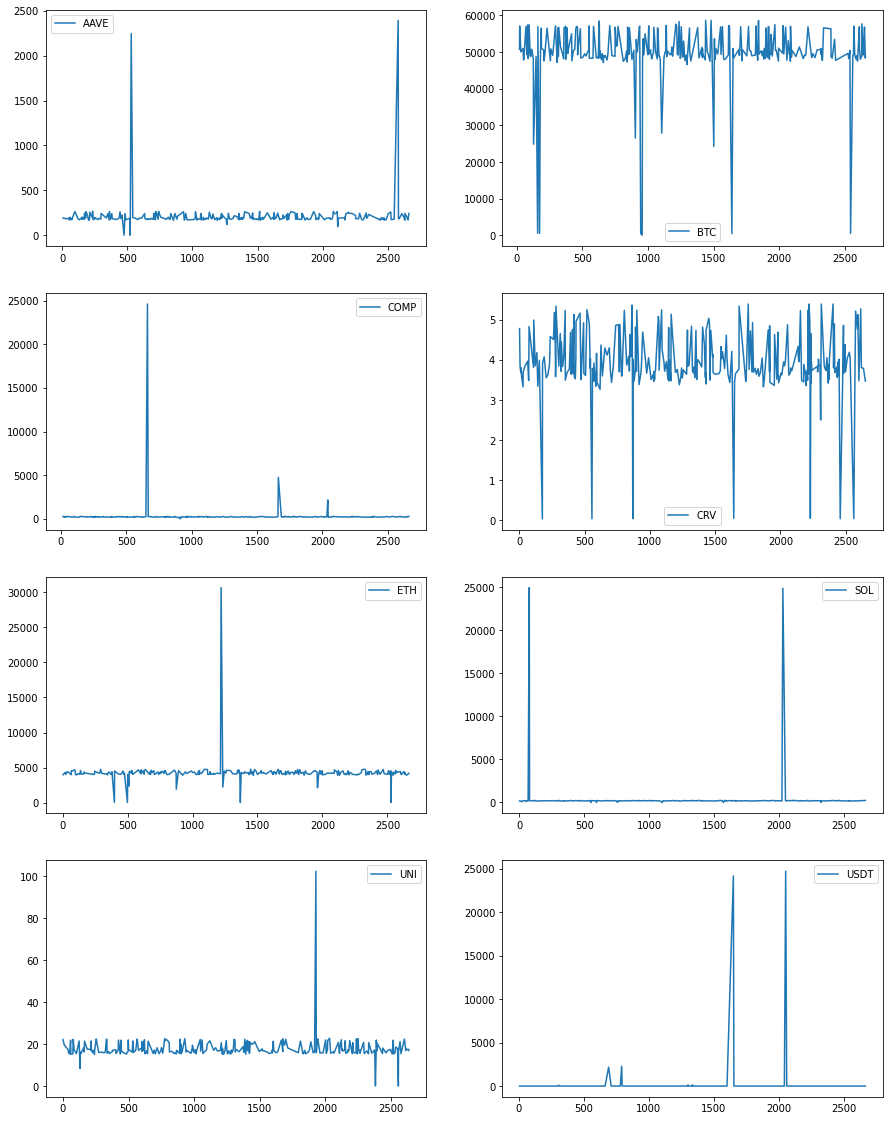

In [ ]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


# I have tried everything. I am sorry.

In [100]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,4.8043,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [101]:
df.volumeUSD = df.volume * df.close

In [102]:
df.volumeUSD

0       7.041235e+05
1       3.522644e+05
2       1.296734e+07
3       7.352023e+07
4       1.341009e+07
            ...     
2661    1.350189e+05
2662    2.308318e+05
2663    8.503920e+06
2665    5.729636e+07
2666    1.796152e+06
Name: volumeUSD, Length: 2443, dtype: float64

In [103]:
# :(